In [1]:
# Packages
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter, NelsonAalenFitter

In [2]:
# Read in main patient database
clean_patients_data = pd.read_csv('/Users/Tom/PycharmProjects/Contour-Analysis/Data/Deep_learning_results/per_vox_cox.csv')

In [3]:
clean_patients_data.head(n=10)

,timeToEvent,recurrence,fractions,stage,grade,risk,volumeContour,volumeContourAuto,volumeContourDifference,DSC,volumeRatio,mean,sd,patientList
0,0.849315,1,19,T3,9,High,60.257812,18.373535,41.884277,0.414799,3.279598,0.732699,0.724895,200900710
1,0.983562,1,19,T2,7,High,38.241211,26.099121,12.142090,0.788471,1.465230,0.154375,0.196008,200911474
2,0.994521,1,19,T1C,9,High,37.221680,23.106445,14.115234,0.723485,1.610879,0.276781,0.363447,200805314
3,1.095890,1,19,T3A,7,High,39.568359,27.905273,11.663086,0.739351,1.417953,0.118300,0.320738,200806929
4,1.238356,1,19,T3,9,High,36.149117,23.459923,12.689194,0.771516,1.540888,0.325353,0.204268,201002873
5,1.271233,1,19,T3,9,High,45.333984,39.238770,6.095215,0.888023,1.155337,0.127031,0.153324,200903652
6,1.397260,1,19,T3B,7,High,52.510254,37.951172,14.559082,0.774447,1.383627,0.181181,0.342483,200909554
7,1.419178,1,19,T3a,7,High,38.779713,35.995556,2.784157,0.906252,1.077347,0.112131,0.187214,201005411
8,1.438356,1,19,T3b,7,High,29.828659,20.057688,9.770971,0.750989,1.487143,0.219948,0.275781,201202325
9,1.457534,1,19,T3,7,High,33.785156,32.822754,0.962402,0.873392,1.029321,0.006125,0.246160,200609629


In [4]:
# Add Covariates
psa_data = pd.read_csv('/Users/Tom/PycharmProjects/Contour-Analysis/Data/Deep_learning_results/psa_patients.csv')
age_data = pd.read_csv('/Users/Tom/PycharmProjects/Contour-Analysis/Data/Deep_learning_results/patientAges.csv')

In [5]:
# Merge covariates using patient ID
merged_patient_data = pd.merge(clean_patients_data, psa_data, how='inner', on='patientList')

In [6]:
merged_patient_data = pd.merge(merged_patient_data, age_data, how='inner', on='patientList')
merged_patient_data.head(n=1)

,timeToEvent,recurrence,fractions,stage,grade,risk,volumeContour,volumeContourAuto,volumeContourDifference,DSC,volumeRatio,mean,sd,patientList,psa,age
0,0.849315,1,19,T3,9,High,60.257812,18.373535,41.884277,0.414799,3.279598,0.732699,0.724895,200900710,33.6,60


In [7]:
# rename risk to High, Intermediate, Low
merged_patient_data['risk'] = merged_patient_data['risk'].apply(lambda x: 'Low' if x == 'Low' else ('High' if x == 'High' else 'Intermediate'))

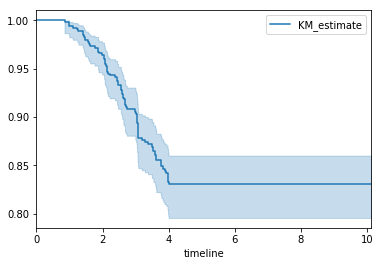

In [8]:
T = merged_patient_data["timeToEvent"]
E = merged_patient_data["recurrence"]

kmf = KaplanMeierFitter()
kmf.fit(T, event_observed=E)
kmf.plot()

In [9]:
# Survival functions
def survival_analysis_fractions(patient_df):
    T = patient_df["timeToEvent"]
    E = patient_df["recurrence"]
    kmf = KaplanMeierFitter()
    fraction_19 = patient_df["fractions"]
    ix_19 = fraction_19 == 19
    #
    kmf.fit(T[ix_19], E[ix_19], label='First Quartile')
    a2 = kmf.plot()
    # fit the model for 2nd cohort
    kmf.fit(T[~ix_19], E[~ix_19], label='Second Quartile')
    kmf.plot(ax=a2)
    plt.show()
    return
    
def survival_analysis_dsc(patient_data_base, category='DSC'):
    # Remove patient that have not time event
    # patient_data_base = patient_data_base[patient_data_base.recurrenceTime != '']

    # Survival function groupby DSC
    category_groups = patient_data_base[category].quantile([.25, .5, .75, 1.0])
    dsc = patient_data_base[category]

    ix_1 = (dsc <= category_groups[0.25])
    ix_2 = (dsc > category_groups[0.25]) & (dsc < category_groups[0.5])
    ix_3 = (dsc > category_groups[0.5]) & (dsc < category_groups[0.75])
    ix_4 = (dsc > category_groups[0.75])

    # fit the model for 1st cohort
    kmf.fit(T[ix_1], E[ix_1], label='First Quartile')
    a1 = kmf.plot()
    # fit the model for 2nd cohort
    kmf.fit(T[ix_2], E[ix_2], label='Second Quartile')
    kmf.plot(ax=a1)
    # fit the model for 3rd cohort
    kmf.fit(T[ix_3], E[ix_3], label='Third Quartile')
    kmf.plot(ax=a1)
    # fit the model for 4th cohort
    kmf.fit(T[ix_4], E[ix_4], label='Forth Quartile')
    kmf.plot(ax=a1)
    plt.show()
    return

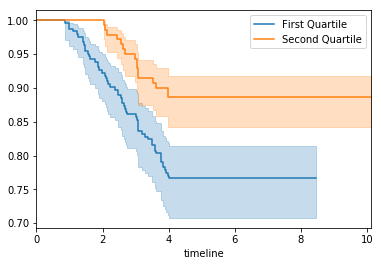

In [10]:
survival_analysis_fractions(merged_patient_data)

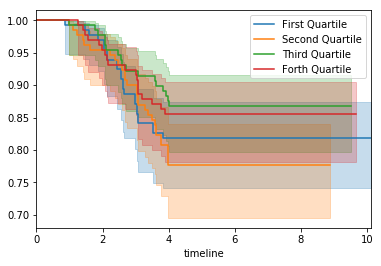

In [11]:
survival_analysis_dsc(merged_patient_data,'DSC')

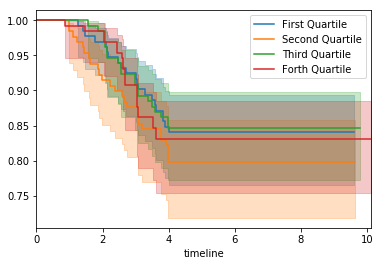

In [12]:
survival_analysis_dsc(merged_patient_data,'volumeContourDifference')

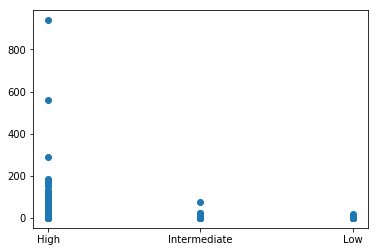

In [13]:
plt.scatter(merged_patient_data['risk'],merged_patient_data['psa'])

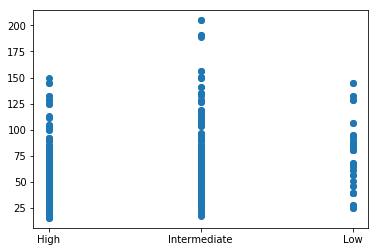

In [14]:
plt.scatter(merged_patient_data['risk'],merged_patient_data['volumeContour'])

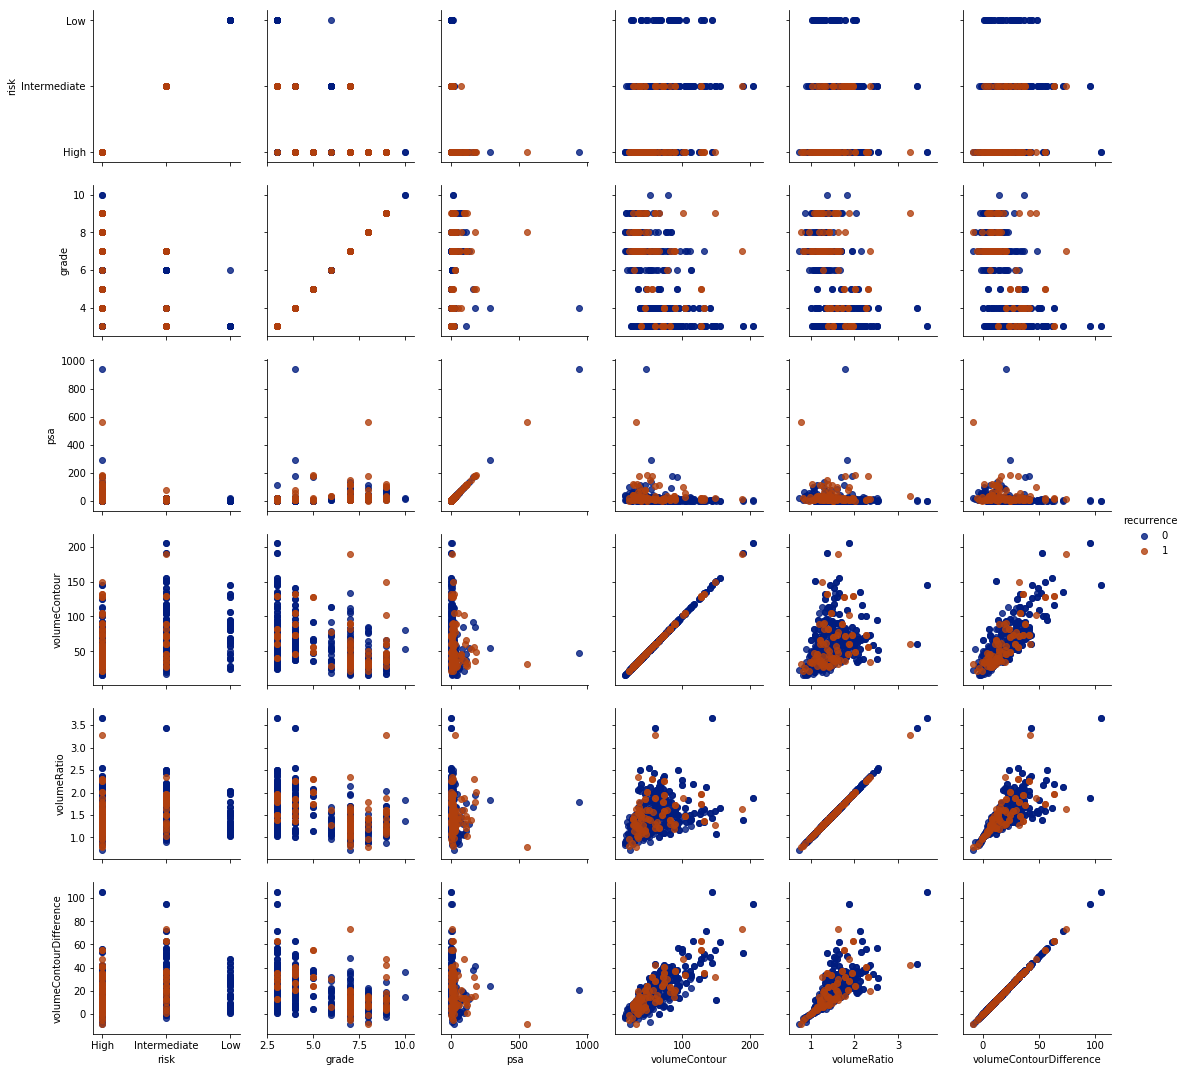

In [15]:
g = sns.PairGrid(merged_patient_data, vars=['risk', 'grade', 'psa', 'volumeContour', 'volumeRatio', 'volumeContourDifference'],
                     hue='recurrence', palette='dark')
g.map(plt.scatter, alpha=0.8)
g.add_legend();
plt.show(block=True)

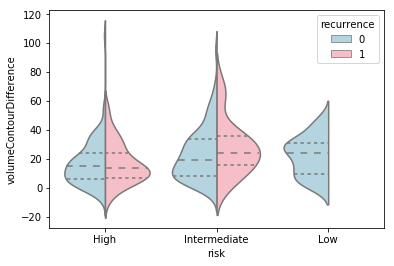

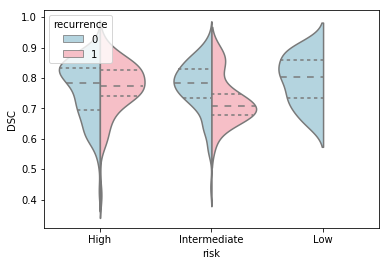

In [16]:
rec = (merged_patient_data.recurrence == 'Rec')
no_rec = (merged_patient_data.recurrence == 'No Rec')

with sns.axes_style(style=None):
    sns.violinplot("risk", "volumeContourDifference", hue="recurrence", data=merged_patient_data,
                   split=True, inner="quartile",
                   palette=["lightblue", "lightpink"]);
plt.show()
with sns.axes_style(style=None):
    sns.violinplot("risk", "DSC", hue="recurrence", data=merged_patient_data,
               split=True, inner="quartile",
               palette=["lightblue", "lightpink"]);
plt.show()


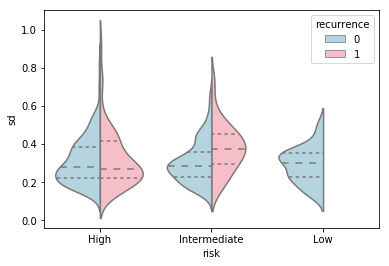

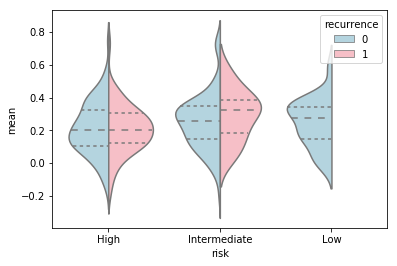

In [17]:
with sns.axes_style(style=None):
    sns.violinplot("risk", "sd", hue="recurrence", data=merged_patient_data,
               split=True, inner="quartile",
               palette=["lightblue", "lightpink"]);
plt.show()

with sns.axes_style(style=None):
    sns.violinplot("risk", "mean", hue="recurrence", data=merged_patient_data,
               split=True, inner="quartile",
               palette=["lightblue", "lightpink"]);
plt.show()

In [27]:
# Import test functions
from significance_test import global_statistical_analysis

global_statistical_analysis(merged_patient_data)

#rec: 89, #n_rec: 436


Vdiff: p_value(rec=/=n_rec): 0.859600 p_value(rec<n_rec): 0.435200 p_value(rec>n_rec): 0.564800


DSC: p_value(rec=/=n_rec): 0.355800 p_value(rec<n_rec): 0.175700 p_value(rec>n_rec): 0.824300


VRatio: p_value(rec=/=n_rec): 0.889300 p_value(rec<n_rec): 0.562800 p_value(rec>n_rec): 0.437200


In [29]:
# Analysing global variables by risk
high_risk_patients = merged_patient_data.groupby("risk").get_group("High")
global_statistical_analysis(high_risk_patients)
int_risk_patients = merged_patient_data.groupby("risk").get_group("Intermediate")
global_statistical_analysis(int_risk_patients)

#rec: 65, #n_rec: 209


Vdiff: p_value(rec=/=n_rec): 0.975900 p_value(rec<n_rec): 0.525400 p_value(rec>n_rec): 0.474600


DSC: p_value(rec=/=n_rec): 0.490800 p_value(rec<n_rec): 0.748600 p_value(rec>n_rec): 0.251400


VRatio: p_value(rec=/=n_rec): 0.393200 p_value(rec<n_rec): 0.202900 p_value(rec>n_rec): 0.797100
#rec: 24, #n_rec: 178


Vdiff: p_value(rec=/=n_rec): 0.308000 p_value(rec<n_rec): 0.846600 p_value(rec>n_rec): 0.153400


DSC: p_value(rec=/=n_rec): 0.026200 p_value(rec<n_rec): 0.016300 p_value(rec>n_rec): 0.983700


VRatio: p_value(rec=/=n_rec): 0.110900 p_value(rec<n_rec): 0.936500 p_value(rec>n_rec): 0.063500
